## Clustering With K Means

30 January 2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from env import sql_connexion

from prepare import tts

In [2]:
# Mall customers

# def retrieve_mall(df):
mall_query = '''
            SELECT * 
            FROM customers
            '''

mall_url = sql_connexion('mall_customers')

mall_df = pd.read_sql(mall_query, mall_url)
    
#     return mall_df

# this function does not (yet) work

In [3]:
mall_df.head(3)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


&emsp;


**If we see bands of clusters, we need to verify that we've appropriately scaled data first.**

### K Means :
- Easy to use and iterate ;
- We determine the number of clusters, instead of letting the computer decide how many clusters are needed to best describe the data (cf DBScan) ;  
- Assumption made that the clusters will be circular ;
- SCALE YOUR DATA (bc kmeans uses distance) ;
- Use .cluster_centers_, .inertia_ to see how kmeans describes data on the backend ; the underscore indicates that we're looking at an _attribute_ of the kmeans model.

In [4]:
train, val, test = tts(mall_df)
train.shape

(112, 5)

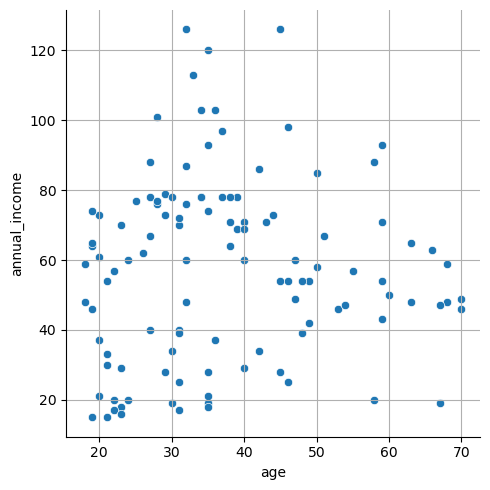

In [65]:
sns.relplot(data = train, x = 'age', y = 'annual_income')
plt.grid()
plt.show()

### How many clusters are there ? 

Firstly, do this unscaled. Looking at custers for age and anual income.

In [6]:
# setting x variable

X = train[['age', 'annual_income']]

In [7]:
# creating instance of sklearn object
# decisindg to lookg at 3 clusters ( a hyper parameter )
# assigning a seed of '23' ( a hyper parameter )


kmeans = KMeans(n_clusters = 3, random_state = 23)

# fitting the object to our X variable
kmeans.fit(X)

# predicting clusters, which returns an array
kmeans.predict(X)

array([0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2,
       0, 1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 2,
       1, 1, 1, 2, 1, 1, 0, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0, 2, 1, 2, 0, 1,
       0, 0], dtype=int32)

**It makes more sense to visualise the array (observations labelled in the df).**

In [8]:
# saving the predict results to the df
# running this cell a second time will error out

X['unscaled_clusters'] = kmeans.predict(X)
X.head()

/var/folders/v1/7y2hc6q17wl2rjlpg8h9g78h0000gn/T/ipykernel_1145/4006888134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['unscaled_clusters'] = kmeans.predict(X)


,age,annual_income,unscaled_clusters
11,35,19,0
151,39,78,1
49,31,40,0
113,19,64,1
143,32,76,1


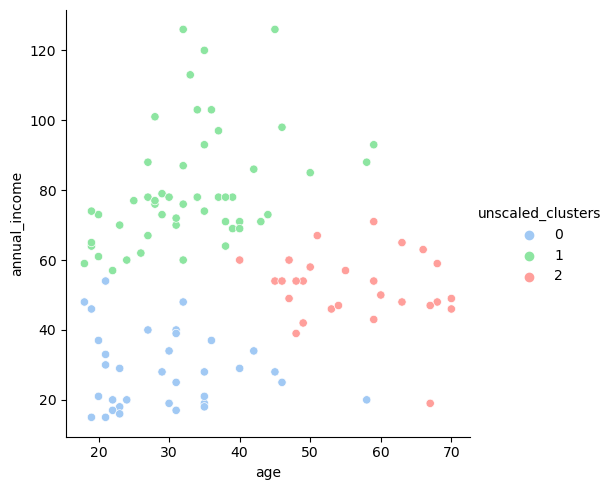

In [32]:
sns.relplot(data = X, x = 'age', y = 'annual_income', hue = 'unscaled_clusters', palette = 'pastel6')
plt.show()

### Now with scaling : THE PROPER WAY

### CAN ONLY USE FIT_TRANSFORM ON THE TRAIN DATASET.

BUT WE STILL SCALE EVERYTHING (TRAIN, VAL, TEST).   
            
            DO NOT CREATE NEW MM_SCALER OBJECT TO USE ON VAL & TEST.


In [34]:
mm_scaler = MinMaxScaler()

X[['age', 'annual_income']] = mm_scaler.fit_transform(X[['age', 'annual_income']])

X.head(3)

/var/folders/v1/7y2hc6q17wl2rjlpg8h9g78h0000gn/T/ipykernel_1145/3091667320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['age', 'annual_income']] = mm_scaler.fit_transform(X[['age', 'annual_income']])


,age,annual_income,unscaled_clusters
11,0.326923,0.036036,0
151,0.403846,0.567568,1
49,0.250000,0.225225,0


In [35]:
kmeans_scale = KMeans(n_clusters = 3, random_state = 23)

kmeans_scale.fit(X[['age', 'annual_income']])

KMeans(n_clusters=3, random_state=23)

In [36]:
kmeans_scale.predict(X[['age', 'annual_income']])

array([2, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, 0, 1, 0,
       2, 1, 1, 0, 1, 1, 0, 0, 0, 2, 2, 1, 0, 2, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 0,
       1, 1, 1, 0, 1, 2, 2, 2, 0, 2, 1, 2, 2, 1, 0, 2, 2, 0, 0, 0, 2, 1,
       2, 2], dtype=int32)

In [66]:
# create another new column for X df

X['scaled_clusters'] = kmeans_scale.predict(X[['age', 'annual_income']])


/var/folders/v1/7y2hc6q17wl2rjlpg8h9g78h0000gn/T/ipykernel_1145/161299390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['scaled_clusters'] = kmeans_scale.predict(X[['age', 'annual_income']])


In [39]:
X.head()


,age,annual_income,unscaled_clusters,scaled_clusters
11,0.326923,0.036036,0,2
151,0.403846,0.567568,1,1
49,0.250000,0.225225,0,2
113,0.019231,0.441441,1,1
143,0.269231,0.549550,1,1


### the nature of the clusters can change after scaling (though it's not evident here)

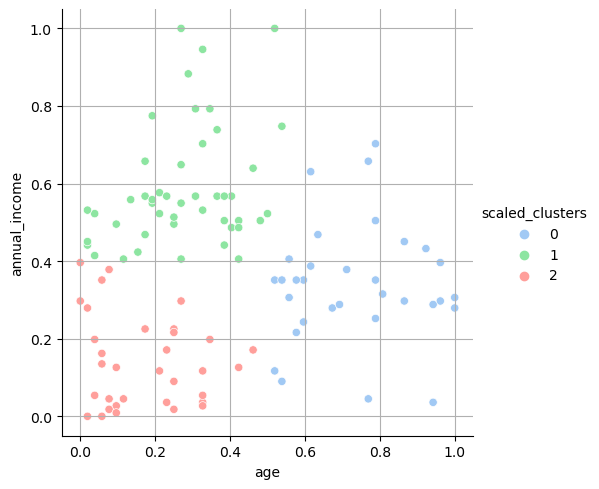

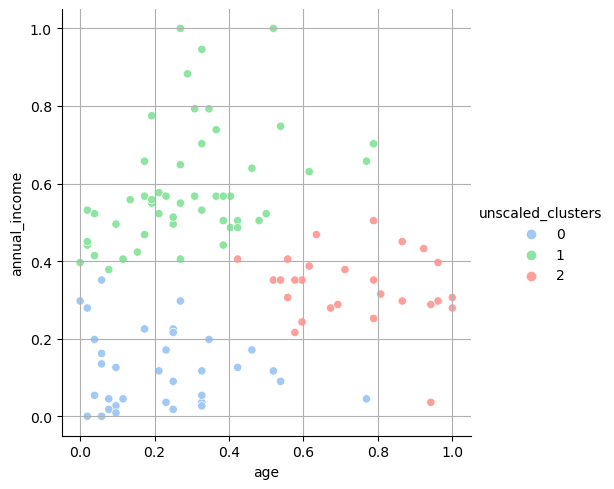

In [64]:
sns.relplot(data = X, x = 'age', y = 'annual_income', hue = 'scaled_clusters', 
            hue_order = [0, 1, 2], palette = 'pastel6')
plt.grid()
plt.show()

sns.relplot(data = X, x = 'age', y = 'annual_income', hue = 'unscaled_clusters',  
            hue_order = [0, 1, 2], palette = 'pastel6')
plt.grid()
plt.show()

## INERTIA

In [46]:
# looking at the numeric / theoretical centre of the clusters

kmeans_scale.cluster_centers_

array([[0.73377404, 0.3384009 ],
       [0.27577741, 0.58654399],
       [0.17074592, 0.14086814]])

In [48]:
# centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
# centroids

# iris.groupby('cluster')['petal_length', 'sepal_length'].mean()

# plt.figure(figsize=(14, 9))

# for cluster, subset in iris.groupby('cluster'):
#     plt.scatter(subset.sepal_length, subset.petal_length, label='cluster ' + str(cluster), alpha=.6)

# centroids.plot.scatter(y='petal_length', x='sepal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

# plt.legend()
# plt.xlabel('sepal_length')
# plt.ylabel('petal_length')
# plt.title('Visualizing Cluster Centers')


In [49]:
# where the inertia drops off

kmeans_scale.inertia_

4.470842935400286

In [52]:
# creating inertia loop

inertia = []
seed = 23

for n in range(1, 11): 
    # n clusters allows for clusters to increment as the loop loops
    kmeans = KMeans(n_clusters = n, random_state = seed)
    
    kmeans.fit(X[['age', 'annual_income']])
    
    # append the inertia of the particular model to the list of inertias
    inertia.append(kmeans.inertia_)
    
inertia

[14.374651986008535,
 8.477812353366854,
 4.470842935400286,
 3.4543867487716513,
 2.7382829984076302,
 2.1638632866495158,
 1.8005342163867315,
 1.4960289348529243,
 1.2699464456106269,
 1.092541307707528]

    # as the clustering continues, inertia will reduce because the clusters are clustering


In [54]:
# make a df of info : key = column name, coressponding value = values

# making a list of the range should unpack the range objectinto the actual nubers

results_df = pd.DataFrame({'n_clusters' : list(range(1, 11)), 
              'inertia' : inertia})

results_df

,n_clusters,inertia
0,1,14.374652
1,2,8.477812
2,3,4.470843
3,4,3.454387
4,5,2.738283
5,6,2.163863
6,7,1.800534
7,8,1.496029
8,9,1.269946
9,10,1.092541


    # mid 17th century: from Latin iners, inert- ‘unskilled, inactive’, 
    from in- (expressing negation) + ars, art- ‘skill, art’.

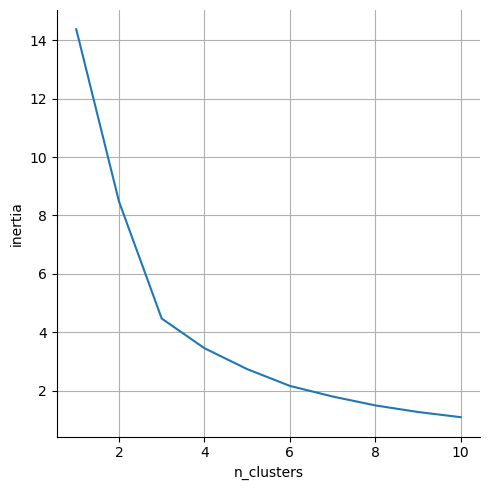

In [62]:
sns.relplot(data = results_df, x = 'n_clusters', y = 'inertia', kind = 'line')
plt.grid()
plt.show()

    *  Looking for the most acute angle in the graph.
    *  If clustering on a different group of two, or if clustering on 3 features, etc, 
        this result would no longer apply.
    *  Clustering on the target variable : Can build clusters including target variable for exploration, 
        but cannot include target variable when _predicting_ target variable.